In [1]:
import astropy.io
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.colors as col
import math
import pandas as pd
import time

from astropy.io import fits
from scipy.ndimage import gaussian_filter1d
from scipy.signal import argrelextrema
from math import pi

In [2]:
def ring(data, pixel_size, center_x, center_y, file_count):

    r_vals = []
    
    r_dict_I = {}
    r_dict_pix = {}
    tic = time.perf_counter()
    y_len = len(data)
    x_len = len(data[1])
    
    
    #delta = round(center_x/35) + 1
    #print(delta)
    

    for y in range(y_len):
        
        for x in range(x_len):

            I = data[y, x]
            

            rx = abs(center_x - x)
            ry = abs(center_y - y)
            r = round(math.sqrt(rx**2 + ry**2))
            r = int(r)


            if r in r_vals:
                #cur_I_sum = r_dict_I[r]
                r_dict_I[r] += I

                #cur_pix_sum = r_dict_pix[r]
                r_dict_pix[r] += 1


            else:
                r_vals.append(r)

                r_dict_I[r] = I


                r_dict_pix[r] = 1

    r_dict_I_sort = sorted(r_dict_I.keys())
    
    r_lst = []
    cul_vals = []
    I_vals = []
    moving_sum = 0
    
   
    for key in r_dict_I_sort:
        if r_dict_I[key] != 0:
            r_cm = pixel_size * key
            r_kpc = round((r_cm * 3.24077928967e-19) / 1e3, 4)

            r_lst.append(r_kpc)
            I_pix = r_dict_I[key] / r_dict_pix[key]
            moving_sum += I_pix
            cul_vals.append(moving_sum)
            I_vals.append(I_pix)
    
        
    max_val = cul_vals[-1]
    norm_cul_vals = []
    for element in cul_vals:
        norm = element / max_val
        norm_cul_vals.append(norm)
        
        
        
        
    plt.plot(r_lst, I_vals)
    plt.title("Jet Intensities Radially")
    plt.xlabel("R-Value (kpc)")
    plt.ylabel("Intensity Value")
    plt.show()
    
    plt.bar(r_lst, norm_cul_vals, width=0.5)
    plt.plot(r_lst, norm_cul_vals)
    plt.title("Normalized Cumulative Histogram of Jet Intensities Radially")
    plt.xlabel("R-Value (kpc)")
    plt.ylabel("Normalized Cumulative Value")
    plt.show()
    
    
    if file_count >= 7:
        # 1. Create an array with outliers
        # 2. Determine mean and standard deviation
        mean = np.mean(I_vals)
        std_dev = np.std(I_vals)
        # 3. Normalize array around 0
        zero_based = abs(I_vals - mean)
        # 4. Define maximum number of standard deviations
        max_deviations = 1



        no_outliers = []

        for i, element in enumerate(zero_based):
            if element < max_deviations * std_dev:
                no_outliers.append(I_vals[i])
            else:
                no_outliers.append(0)


        plt.plot(r_lst[20:], no_outliers[20:])
        plt.title("Jet Intensities Radially")
        plt.xlabel("R-Value (kpc)")
        plt.ylabel("Intensity Value")
        plt.show()

    pixel_count = 0
    for element in norm_cul_vals:
        if element >= 0.02 and element <= 0.98:
            pixel_count += 1
            
    jet_r_cm = pixel_size * pixel_count
    jet_r_kpc = round((jet_r_cm * 3.24077928967e-19) / 1e3, 4)
    print("\nTotal Radius (96%): {} kpc".format(jet_r_kpc))
    
    toc = time.perf_counter()
    print("\nCompleted in {} seconds".format(round(toc - tic)))
    


        
        
                    
                    
    
        
    


JET RING DETERMINING PROGRAM:
____________________________________________________________________________________________________

File Number 1/12

Simulation Title: Simulation Group_L446_rc100_beta07 - 1.0 Myr - 30 MHz


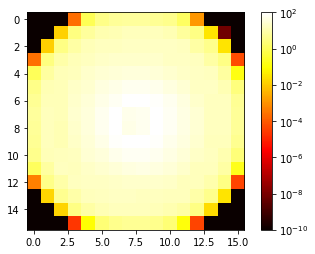

good? y


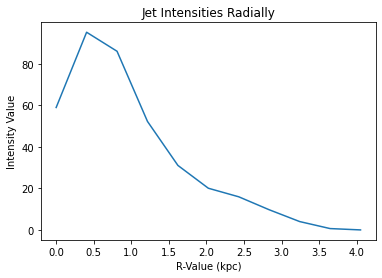

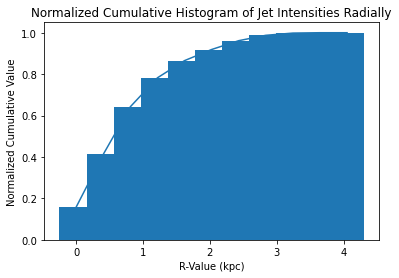


Total Radius (96%): 2.8357 kpc

Completed in 0 seconds
____________________________________________________________________________________________________

File Number 2/12

Simulation Title: Simulation Group_L446_rc100_beta07 - 2.0 Myr - 30 MHz


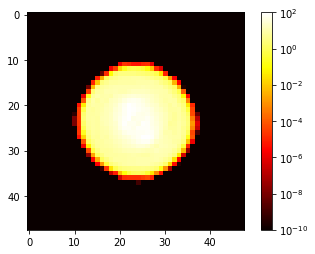

KeyboardInterrupt: Interrupted by user

In [6]:
#Main Calling Block of Code

print("\nJET RING DETERMINING PROGRAM:")
print("{}\n".format("_"*100))

path = '**/Group_L446_rc100_*nu=30.0*0.00_0.00_1.00*Myr.fits*'

# Determines if there are any files in device
total_files = len(glob.glob(path, recursive=True))

if total_files > 0:
    file_count = 0
    delta = 1
    for file in sorted(glob.glob(path, recursive=True)):

        file_count += 1

        try:
            print("File Number {}/{}\n".format(file_count, total_files))
            #print("File Name: {}".format(file))
            
            image_data = fits.getdata(file, ext=0)
            fits_image_hdul = fits.open(file)

            #Displays FITS Image title, time index, and pixel size
            sim_title = fits_image_hdul[0].header['OBJECT']
            sim_time = fits_image_hdul[0].header['TIME']
            pixel = fits_image_hdul[0].header['CDELT1']
            print("Simulation Title: {}".format(sim_title))
            #print("Time index: {}".format(sim_time))
            #print("Pixel size: {}".format(pixel))
            pixel_size = float(pixel[:-3])
            
            center_x = round(float(fits_image_hdul[0].header['CRPIX1']))
            center_y = round(float(fits_image_hdul[0].header['CRPIX2']))
            center = (center_x, center_y)
            #print("Center of fits image: {}".format(center))

            #Difines Data From FITS image and records image dimensions
            data =  fits_image_hdul[0].data
            length = len(data[0])
            width = len(data)
            #print("FITS Image Dimensions: {}x{} pixels \n".format(length, width))

            for i in range(image_data.shape[0]):
                for j in range(image_data.shape[1]):
                    if image_data[i, j] == 0:
                        image_data[i, j] = 1e-12
            
            
            plt.figure()
            ime = plt.imshow(image_data, cmap='hot', norm=col.LogNorm())
            plt.clim(10e-11, 1e2) 
            plt.colorbar() 
            plt.show()
            
            good = input("good?")
            plt.close()
            

            
            ring(data, pixel_size, center_x, center_y, file_count)
            
            

            #Calls jet_width function
            #print("\nJET WIDTH DATA:")
            #print("{}\n".format("~"*50))
            #jet_width(data, width, pixel_size)

            print("{}\n".format("_"*100))

        except OSError:
            print("Error with file: {}".format(file))
            print("Empty or corrupt FITS file")
            
else:
    print("ERROR: Could not find any necessary files on your device")
    print("Program intakes files of the name: {}".format(path))